In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Código ON/OFF</button>''', raw=True)

Código ON/OFF

###### GS Glb SmCp CORE® Eq E EUR Acc Close - ISIN LU0245181838 - Mutual Fund

##### vs

###### Invesco Global Smaller Coms Eq E EUR Acc - ISIN LU0607512935 - Mutual Fund

##### vs

###### SPDR® MSCI World Small Cap UCITS ETF (EUR) | ZPRS

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly
import time

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from matplotlib.ticker import FuncFormatter
from pandas_datareader import data as pdr
from time import gmtime, strftime
from datetime import datetime

# Setting pandas dataframe display options
pd.set_option('display.width', 800)
pd.set_option('max_colwidth', 800)
pd.set_option("display.max_rows", 2000)

# Set matplotlib style
plt.style.use('seaborn')

# Set plotly offline
init_notebook_mode(connected=True)

In [3]:
import cufflinks as cf
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [4]:
a = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print('A última vez que este script foi executado foi em:', a)

A última vez que este script foi executado foi em: 2017-10-09 13:09:48


In [5]:
#### Functions ####
def compute_drawdowns(dataframe):
    """
    Function to compute drawdowns of a timeseries
    """
    return (dataframe / dataframe.cummax() -1) * 100

In [6]:
# Downloading funds and creating quotes and returns dataframes
Begin = "2013-12-20"
                           
MSid = ['F000000FH0', 'F00000NGSG']
Nomes = ['GS_GSC', 'InvescoGSC']
fundos = pd.DataFrame()

# Conversão de datetime
conv = time.strptime(Begin,"%Y-%m-%d") 
start_date = time.strftime("%m/%d/%Y",conv)

# Download
for ticker in MSid:
    url = "https://lt.morningstar.com/api/rest.svc/timeseries_price/2nhcdckzon?id=" + str(ticker) + "&currencyId=BAS&idtype=Morningstar&frequency=daily&startDate=" + start_date + "&outputType=CSV"
    fundo = pd.read_csv(url, sep = ";" , index_col = 'date', parse_dates = True)
    fundo =  fundo.drop('Unnamed: 2', 1)
    fundos = fundos.merge(fundo, left_index = True, right_index = True, how='outer')
    
fundos.columns = Nomes
fundos = fundos.fillna(method='ffill')

In [7]:
fundos.head()

,GS_GSC,InvescoGSC
date,,
2013-12-20,12.44,15.78
2013-12-23,12.55,15.90
2013-12-27,12.58,16.02
2013-12-30,12.63,16.13
2013-12-31,12.65,16.17


In [8]:
Quotes = pd.read_csv('ZPRS.csv', sep=' ')
# For some reason pandas is not directly parsing dates. Have to do it manually 

In [9]:
Quotes.date = pd.to_datetime(Quotes.date)

In [10]:
Quotes.set_index('date', inplace=True)

In [11]:
Quotes.columns = ['ZPRS']

In [12]:
Quotes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1390 entries, 2013-12-20 to 2017-10-09
Data columns (total 1 columns):
ZPRS    1389 non-null float64
dtypes: float64(1)
memory usage: 21.7 KB


In [13]:
Quotes_df = Quotes.merge(fundos, left_index = True, right_index = True, how='inner')

In [14]:
Quotes_df.head()

,ZPRS,GS_GSC,InvescoGSC
date,,,
2013-12-20,NaN,12.44,15.78
2013-12-23,37.66,12.55,15.90
2013-12-27,37.81,12.58,16.02
2013-12-30,37.91,12.63,16.13
2013-12-31,38.00,12.65,16.17


In [15]:
Quotes_df.tail()

,ZPRS,GS_GSC,InvescoGSC
date,,,
2017-10-02,59.56,19.31,25.31
2017-10-03,59.83,19.33,25.36
2017-10-04,59.60,19.35,25.33
2017-10-05,59.60,19.39,25.36
2017-10-06,59.60,19.39,25.46


In [16]:
Quotes_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 953 entries, 2013-12-20 to 2017-10-06
Data columns (total 3 columns):
ZPRS          952 non-null float64
GS_GSC        953 non-null float64
InvescoGSC    953 non-null float64
dtypes: float64(3)
memory usage: 29.8 KB


In [17]:
# Reordering the columns
Quotes_df = Quotes_df[['GS_GSC', 'InvescoGSC', 'ZPRS']]

In [18]:
Quotes_df = Quotes_df.fillna(method='ffill').fillna(method='bfill')

In [19]:
Quotes_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 953 entries, 2013-12-20 to 2017-10-06
Data columns (total 3 columns):
GS_GSC        953 non-null float64
InvescoGSC    953 non-null float64
ZPRS          953 non-null float64
dtypes: float64(3)
memory usage: 29.8 KB


In [20]:
#### Normalization to 100 ####
Quotes_df_norm = round((Quotes_df / Quotes_df.iloc[0] * 100), 2)

In [21]:
Quotes_df_norm.head()

,GS_GSC,InvescoGSC,ZPRS
date,,,
2013-12-20,100.00,100.00,100.00
2013-12-23,100.88,100.76,100.00
2013-12-27,101.13,101.52,100.40
2013-12-30,101.53,102.22,100.66
2013-12-31,101.69,102.47,100.90


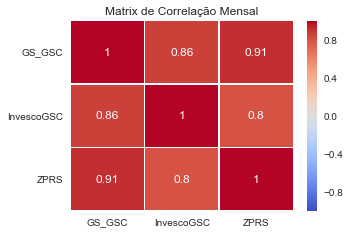

In [22]:
#### Get monthly returns for correlation matrix
Quotes_monthly = Quotes_df_norm.resample('BM').last().copy()
Returns_monthly = (Quotes_monthly / Quotes_monthly.shift(1)) - 1

##### New Preturns (to include Portfolio returns) ####
Preturns = Returns_monthly.copy()

##### Correlation (bonus: Seaborn heatmap)####
Pcorr_matrix = Preturns.corr()
a = -0.5

# Normal heatmap
fig, ax = plt.subplots()
fig.set_size_inches(5, 3.5) # 68%
sns.heatmap(Pcorr_matrix, annot = True, cmap = "coolwarm", linewidths=.2, vmin=-1)
plt.yticks(rotation=360)
plt.title('Matrix de Correlação Mensal')
plt.show()

In [23]:
#### Returns ####
returns = (Quotes_df_norm / Quotes_df_norm.shift(1)) - 1

In [24]:
Quotes_df_norm.iplot(kind='scatter',yTitle='Valor por cada 100€ investidos', title='Performance dos fundos Global Small Caps',
                    colors=['royalblue', 'orange', 'dimgray'])

In [25]:
#### Computing Drawdowns ####
DD = round(compute_drawdowns(Quotes_df_norm), 2)

DD.iplot(kind='scatter', title='Drawdown dos portfolios', yTitle='Percentagem', colors=['royalblue', 'orange', 'dimgray'])

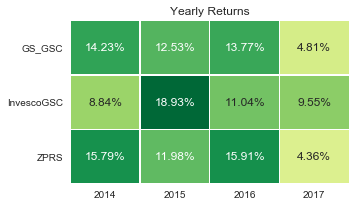

In [32]:
# Resampling to yearly (business year)
yearly_quotes = Quotes_df_norm.resample('BA').last()

# Adding first quote (only if start is in the middle of the year) ### Falta trabalho para automatizar #####
yearly_quotes = pd.concat([Quotes_df_norm.iloc[:1], yearly_quotes])

# Returns
yearly_returns = ((yearly_quotes / yearly_quotes.shift(1)) - 1) * 100
returns = yearly_returns.set_index([list(range(2012, 2018))]).drop(2012).drop(2013)

#### Inverter o sentido das rows no dataframe ####
returns = returns.transpose()

# Yearly returns heatmap
fig, ax = plt.subplots()
fig.set_size_inches(5, 3) # 68%
heatmap = sns.heatmap(returns, annot=True, cmap="RdYlGn", linewidths=.2, fmt=".2f", cbar=False, center=1)
for t in heatmap.texts: t.set_text(t.get_text() + "%")
plt.title('Yearly Returns')
plt.yticks(rotation=360)
plt.show()

In [27]:
Racio = round(Quotes_df_norm['InvescoGSC'] / Quotes_df_norm['ZPRS'], 4) 

In [28]:
Racio.iplot(title = 'Ratio between InvescoGSC and ZPRS')

In [29]:
Racio = round(Quotes_df_norm['GS_GSC'] / Quotes_df_norm['ZPRS'], 4) 

In [30]:
Racio.iplot(title = 'Ratio between GS_GSC and ZPRS')